In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('USA_Housing.csv')
df.round(3).head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.459,5.683,7.009,4.09,23086.801,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642,6.003,6.731,3.09,40173.072,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067,5.866,8.513,5.13,36882.159,1058987.988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240,7.188,5.587,3.26,34310.243,1260616.807,USS Barnett\nFPO AP 44820
4,59982.197,5.041,7.839,4.23,26354.109,630943.489,USNS Raymond\nFPO AE 09386


In [3]:
df = df.drop('Address',axis=1)

In [5]:
df.round(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.459,5.683,7.009,4.09,23086.801,1059033.558
1,79248.642,6.003,6.731,3.09,40173.072,1505890.915
2,61287.067,5.866,8.513,5.13,36882.159,1058987.988
3,63345.240,7.188,5.587,3.26,34310.243,1260616.807
4,59982.197,5.041,7.839,4.23,26354.109,630943.489
...,...,...,...,...,...,...
4995,60567.944,7.830,6.137,3.46,22837.361,1060193.786
4996,78491.275,6.999,6.577,4.02,25616.115,1482617.729
4997,63390.687,7.251,4.805,2.13,33266.145,1030729.583
4998,68001.331,5.534,7.130,5.44,42625.620,1198656.872


In [6]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [10]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df[['Price']]

In [11]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X),columns=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'])
y = pd.DataFrame(scalar.fit_transform(y),columns=['Price'])

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [19]:
X = pca.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [33]:
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
predictions = reg.predict(x_test)

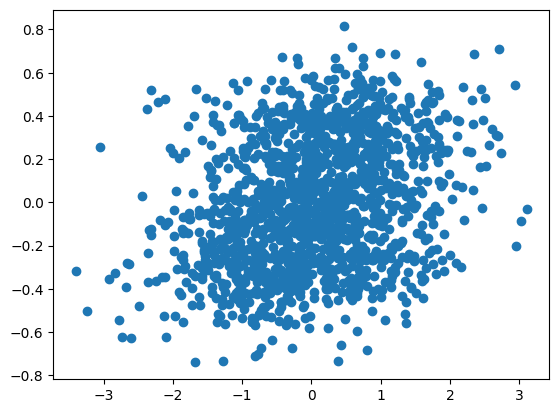

In [35]:
plt.scatter(y_test,predictions)